In [1]:
# --------------------------------------------
# 📦 1. Import Required Libraries
# --------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix
)


In [2]:
# --------------------------------------------
# 📂 2. Load Dataset
# --------------------------------------------
df = pd.read_csv("heart.csv")  # Replace with your actual path if needed
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  



🔍 Summary Statistics:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000    

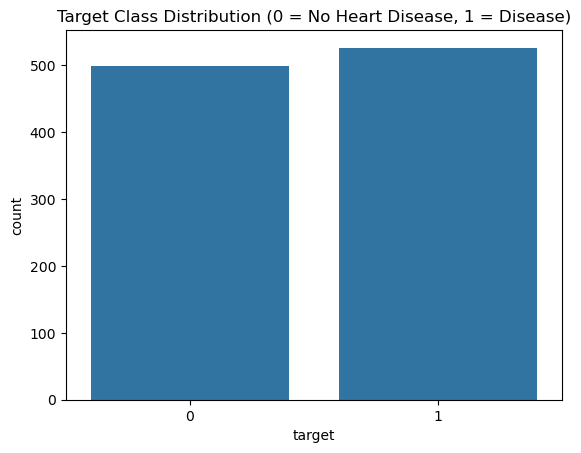

In [3]:
# --------------------------------------------
# 📊 3. Descriptive Statistics & Distribution
# --------------------------------------------
print("\n🔍 Summary Statistics:\n", df.describe())
print("\n🎯 Target Distribution:\n", df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution (0 = No Heart Disease, 1 = Disease)")
plt.show()

In [4]:
# --------------------------------------------
# ✅ 4. Missing Value Check
# --------------------------------------------
print("\n🧼 Missing Values:\n", df.isnull().sum())

# --------------------------------------------
# 🧪 5. Hypothesis Testing
# --------------------------------------------

# 5a. T-Test: Cholesterol levels by gender
males = df[df['sex'] == 1]['chol']
females = df[df['sex'] == 0]['chol']
t_stat, p_value = stats.ttest_ind(males, females, equal_var=False)
print(f"\nT-Test for Cholesterol by Gender: t={t_stat:.2f}, p={p_value:.3f}")
if p_value < 0.05:
    print("→ Statistically significant difference in cholesterol levels between genders.")
else:
    print("→ No significant difference.")

# 5b. Chi-Square: Association between exang and target
contingency_table = pd.crosstab(df['exang'], df['target'])
chi2, chi_p, dof, exp = stats.chi2_contingency(contingency_table)
print(f"\nChi-square Test (exang vs target): χ²={chi2:.2f}, p={chi_p:.3f}")
if chi_p < 0.05:
    print("→ Significant association between exercise angina and heart disease.")
else:
    print("→ No significant association.")


🧼 Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

T-Test for Cholesterol by Gender: t=-5.57, p=0.000
→ Statistically significant difference in cholesterol levels between genders.

Chi-square Test (exang vs target): χ²=194.82, p=0.000
→ Significant association between exercise angina and heart disease.


C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


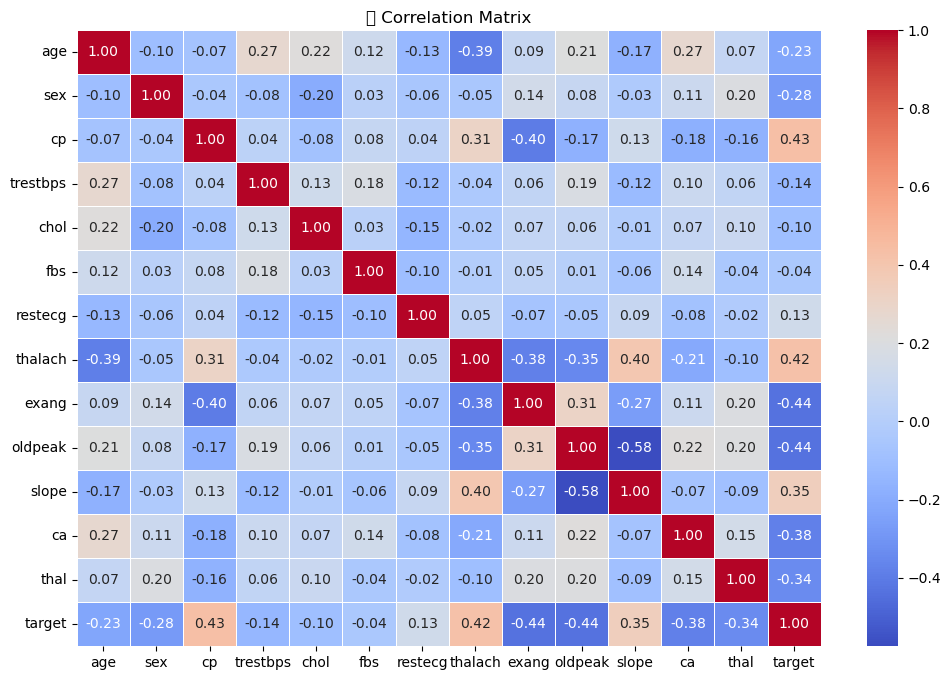

In [5]:
# --------------------------------------------
# 🔗 6. Correlation Matrix
# --------------------------------------------
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Matrix")
plt.show()


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205

🎯 ROC-AUC Score: 0.93


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


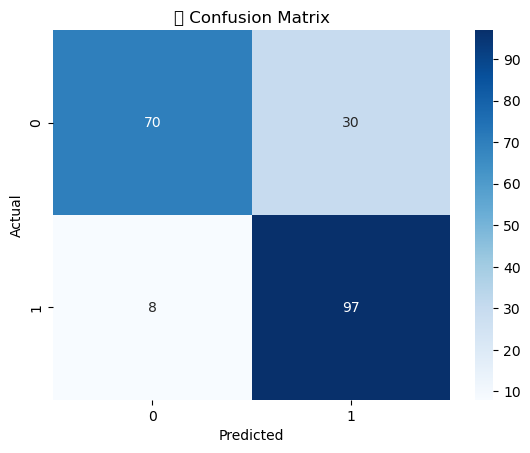

In [6]:
# --------------------------------------------
# 🤖 7. Logistic Regression Modeling
# --------------------------------------------

# Split features and target
X = df.drop(columns=["target"])
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🎯 ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("🧾 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


📌 Top Predictive Features:
 sex     -1.605598
exang   -1.030452
cp       0.846569
thal    -0.820106
ca      -0.725794
dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_12776\3702149151.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeff_df.abs(), y=coeff_df.index, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_12776\3702149151.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


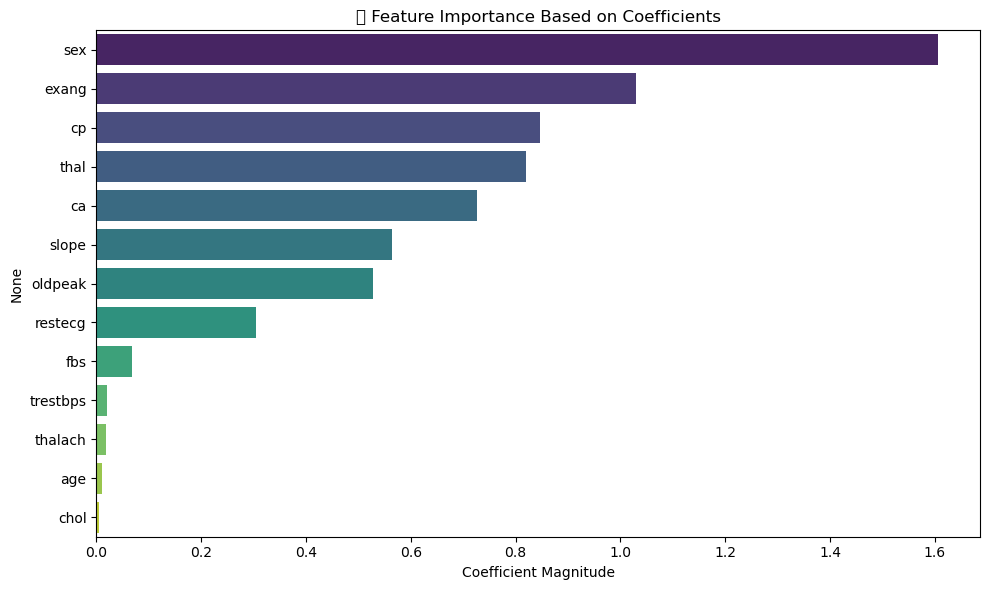

In [7]:
# --------------------------------------------
# 📌 8. Feature Importance (Coefficients)
# --------------------------------------------
coeff_df = pd.Series(model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print("\n📌 Top Predictive Features:\n", coeff_df.head())

plt.figure(figsize=(10, 6))
sns.barplot(x=coeff_df.abs(), y=coeff_df.index, palette='viridis')
plt.title("🔍 Feature Importance Based on Coefficients")
plt.xlabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12776\598464740.py:13: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


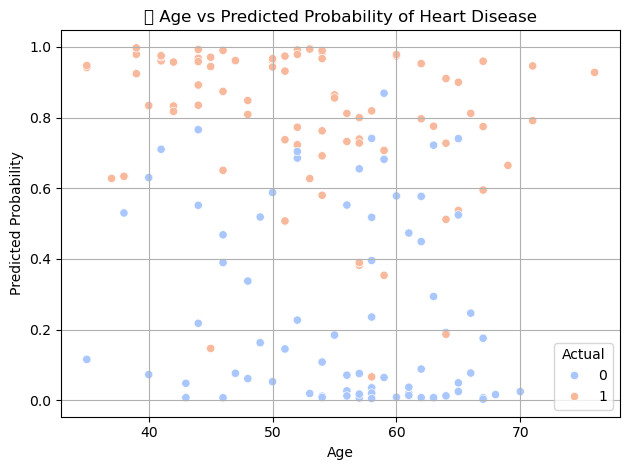

In [8]:
# --------------------------------------------
# 📉 9. Visual: Age vs Predicted Probability
# --------------------------------------------
X_test_plot = X_test.copy()
X_test_plot["Actual"] = y_test.values
X_test_plot["Predicted_Prob"] = y_proba

sns.scatterplot(data=X_test_plot, x='age', y='Predicted_Prob', hue='Actual', palette='coolwarm')
plt.title("📉 Age vs Predicted Probability of Heart Disease")
plt.ylabel("Predicted Probability")
plt.xlabel("Age")
plt.grid(True)
plt.tight_layout()
plt.show()